本节课的学习目标:
- 理解词袋模型与TF-IDF的原理；
- 理解代码每一步的运作逻辑；
- 用样例数据成功运行本代码；
- 尝试对比并理解词袋模型与TF-IDF之间的差异；
- 尝试用自己的数据适当调整本代码，并成功运行。

In [1]:
import pandas as pd
import numpy as np
import re
import jieba
import matplotlib.pyplot as plt     # 画图
from wordcloud import WordCloud     # 词云图
from sklearn.feature_extraction.text import CountVectorizer     # 词袋模型自然语言处理方法
from sklearn.feature_extraction.text import TfidfVectorizer     # TF-IDF自然语言处理方法

In [3]:
# 导入数据
text_ana = pd.read_csv('text_analysis_weibo.csv')
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


In [4]:
# 分析语料
text = list(text_ana['标题/微博内容'])
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

### 数据清洗

#### 剔除符号与数字

In [6]:
def remove_nums(text):
    nonums = re.sub('[^\u4e00-\u9fa5]+', '', text)
    return nonums
test = text_ana['标题/微博内容'][0]
remove_nums(test)

'高校通报教师图书馆打电话声音过大出言不逊公道自在人心谣言自在人心'

#### 分词处理

In [8]:
stopwords = open('stopwords.txt', encoding = 'utf-8').read()
def clean_text(text):
    words = jieba.lcut(text)
    words = [w for w in words if w not in stopwords and w!='\u200b' and w!='转发']
    return ' '.join(words)
test = text_ana['标题/微博内容'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\windows\AppData\Local\Temp\jieba.cache
Loading model cost 0.868 seconds.
Prefix dict has been built successfully.


'高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 公道 人心 谣言 人心'

In [9]:
text_ana['标题/微博内容'] = text_ana['标题/微博内容'].astype(str)
text_ana['words'] = text_ana['标题/微博内容'].apply(remove_nums)
text_ana['words'] = text_ana['words'].apply(clean_text)
text_ana.head()

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域,words
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北,高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 公道 人心 谣言 人心
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西,
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东,刘雨昕 运动 濛 河山 覆 冰雪 健儿 冬奥 金牌 全能 唱 跳 设限 运动 濛 新年 期待...
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东,丁程鑫 丁程鑫 后援会 官博丁 程鑫 超话 丁程鑫 二十 成金筑梦鑫 世界 大年初一 锁定 ...
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东,诶 不要脸 诶 资格 宣传 奥运 抵制 抵制


In [10]:
# 展示语料预处理结果
text = list(text_ana['words'])
text

['高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 公道 人心 谣言 人心',
 '',
 '刘雨昕 运动 濛 河山 覆 冰雪 健儿 冬奥 金牌 全能 唱 跳 设限 运动 濛 新年 期待 全能 音乐 刘雨昕 运动 濛 冬奥 赛事 助力 加油',
 '丁程鑫 丁程鑫 后援会 官博丁 程鑫 超话 丁程鑫 二十 成金筑梦鑫 世界 大年初一 锁定 北京 卫视 门面 主舞 时代 少年 团丁 程鑫 过大年 拥抱 冰雪 致敬 冬奥',
 '诶 不要脸 诶 资格 宣传 奥运 抵制 抵制',
 '',
 '熊猫 守护者 创冰墩 墩 北京 冬奥会 如火如荼 滚滚 朋友 冰墩 墩 活跃 滚滚 一组 舒展 运动 中国 健儿 加油 鼓 劲儿 嘻嘻 嘻嘻 视频 来源 桃花源 生态 保护 基金会',
 '',
 '北京 冬奥会 加油 冰墩 墩 雪容融 可爱 期待 我国 奥运健儿 精彩 表现 开学 季云 支教 冬奥',
 '烊 千玺 助力 东奥 未来',
 '',
 '',
 '守护',
 '烊 千玺 邀 唱响 未来 号 星球 烊 千玺 邀 唱响 未来',
 '翔霖 神谕 感谢 爱奇艺 分享 新年 胜 旧年 春妍 惹 绚烂 万事 胜意 平安 喜乐 祝福 徒增 乐 时代 少年 团 严浩翔 时代 少年 团贺峻霖 少年 关注 北京 台 春晚 拥 锦瑟年华 岁 岁',
 '棒打 打打 叭 呐 呐 晒 晒 厉害 我顶 蔡 徐坤 代言 燕京啤酒 蔡 徐坤 喇叭 萱 蔡 徐坤 超话 蔡 徐坤 代言 燕京啤酒 恭喜 燕京啤酒 北京 冬奥会 官方 赞助商 冬奥 营销 传播 声量 榜单 正式 发布 位列 代言人 蔡 徐坤 释放 活力 点燃 激情 喝彩 冬奥 干杯',
 '',
 '杰克 涛 金牌 稳 笑 不语',
 '',
 '许佳琪 冬奥 中国队 加油',
 '',
 '蹲',
 '',
 '周深 未来 高音 太绝 卡布 叻 周深 录制 未来 花絮 漂亮 高音 简直 绝绝子 周深 唱响 未来 音乐 短片',
 '周深宝 可梦 周年 曲可梦 海角天涯 甘愿 奉陪 赤子 有梦任 艰险 不畏 烟雨 若淡 唯 情深 未了 卡布 叻 周深',
 '白白 嗷',
 '',
 '腾讯 冬奥 报道 雪舞 大使 尹浩宇 尹浩宇 东奥 写下 美好 祝福 心愿 冬奥 健儿 赛场 永远 带 热忱 羞 嗒 嗒 雪舞 花式 祝福 大赛

### 词袋模型

词袋模型（Bag of Words，简称 BoW）是自然语言处理（NLP）中常用的文本表示方法，它将文本转化为数值特征（向量），进而可以用于机器学习等高阶处理。词袋模型将语料转化为二维矩阵，横向为所有在训练数据中出现的不重复的词汇（word），纵向为语料各句子或文档（document）。

简单来说，词袋模型可以帮助大家计算词频。

In [11]:
# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

In [12]:
# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (50000, 189480)


In [13]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['一一列举' '一一对' '一一对应' ... '龟速' '龟速车' '龟龟']


这里特别介绍一下vectorizer.fit()函数与vectorizer.fit_transform()的区别：
- vectorizer.fit()只从语料中学习词汇，并不将学习到的结果转化为矩阵。
- vectorizer.fit_transform()在vectorizer.fit()的基础上将结果转化为矩阵，也就是说这一函数的输出是一个矩阵。

如果语料较少，两个函数可以放在一起直接用vectorizer.fit_transform()，但当数据量较大时（例如我们的样例语料），这个矩阵的长度是惊人的，也是高度占用内存的。因此，我们推荐在理解上述两个函数的基础上按照需求使用。

#### 词频统计

In [14]:
vectorizer.fit(text_ana['words'])

# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 得到词频矩阵
bow_matrix = vectorizer.transform(text_ana['words'])

# 计算词频统计
word_freq = dict(zip(feature_words, bow_matrix.sum(axis=0).A1))

In [19]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

189480

In [16]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('发展', 52411),
 ('建设', 38028),
 ('中国', 37687),
 ('企业', 36060),
 ('市场', 35801),
 ('汽车', 30355),
 ('增长', 26624),
 ('经济', 25110),
 ('亿元', 22758),
 ('项目', 21626),
 ('政策', 21241),
 ('国家', 21233),
 ('工作', 21066),
 ('服务', 19423),
 ('新能源', 19170),
 ('同比', 19045),
 ('推进', 18845),
 ('投资', 18836),
 ('行业', 18267),
 ('提升', 17409),
 ('产业', 17336),
 ('产品', 16789),
 ('数据', 16764),
 ('推动', 15886),
 ('持续', 15503),
 ('技术', 14298),
 ('全国', 13992),
 ('全球', 13913),
 ('创新', 13703),
 ('支持', 13647),
 ('疫情', 13584),
 ('需求', 13056),
 ('城市', 13053),
 ('加快', 12477),
 ('国际', 12345),
 ('发布', 12315),
 ('国内', 12210),
 ('一个', 12009),
 ('相关', 11995),
 ('实施', 11809),
 ('领域', 11754),
 ('影响', 11648),
 ('理想', 11637),
 ('生产', 11554),
 ('品牌', 11505),
 ('重点', 11468),
 ('平台', 11239),
 ('价格', 10964),
 ('销量', 10801),
 ('科技', 10594),
 ('提供', 10539),
 ('情况', 10070),
 ('电池', 10056),
 ('能力', 10007),
 ('时间', 9976),
 ('进一步', 9969),
 ('时代', 9926),
 ('合作', 9908),
 ('中心', 9756),
 ('教育', 9733),
 ('我国', 9484),
 ('管理', 9429),
 ('消费', 9376),

#### 词云图

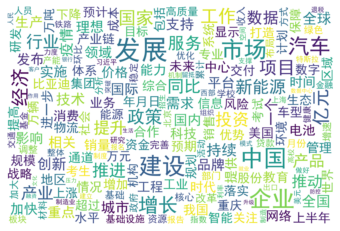

In [22]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=200,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### TF-IDF

TF-IDF也是一种自然语言处理方法（NLP），且是一个无监督式机器学习模型。与词袋模型类似，它也能够对语料进行“词频”分析，只不过这次的“词频”不是简单的计数，而是一个“权重”。TF-IDF会衡量一个词在语料中的重要性，而不是简单地计算词频。例如：“and”这个词可能在语料中出现的频率很高，在每条语料中都可能会出现，但它重要吗？可见，它并不是一个有高度实意的词，因而并不那么重要。在这种情况下，TF-IDF通过考虑逆文档频率而突出了那些有实意的关键词的地位。

In [23]:
# 初始化TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(text_ana['words'])

# 获取词汇表
feature_words_tfidf = tfidf_vectorizer.get_feature_names_out()

# 得到TF-IDF矩阵
tfidf_matrix = tfidf_vectorizer.transform(text_ana['words'])

#### 词频统计

In [24]:
# 计算词频统计
word_freq_tfidf = dict(zip(feature_words_tfidf, tfidf_matrix.sum(axis=0).A1))

In [25]:
# 词袋模型中不重复的词汇的数量
len(word_freq_tfidf)

189480

In [26]:
# 观察词袋模型的词频计数结果
sorted(word_freq_tfidf.items(), key=lambda x: x[1], reverse=True)

[('中国', 489.056836832612),
 ('发展', 409.376159872176),
 ('汽车', 351.421437131645),
 ('建设', 343.9339909757461),
 ('市场', 342.7176997336243),
 ('企业', 287.51684838719046),
 ('增长', 268.07808873509737),
 ('加油', 264.0288056084642),
 ('工作', 262.951682317346),
 ('考研', 258.1467341973587),
 ('经济', 253.87833077504388),
 ('理想', 253.82115790192103),
 ('国家', 247.35046057398455),
 ('考试', 244.84397923982783),
 ('超话', 242.98018530359286),
 ('政策', 242.23245316593386),
 ('亿元', 233.14144550966068),
 ('高校', 229.27719577592933),
 ('发布', 228.5359601671626),
 ('新能源', 227.6280939044246),
 ('诈骗', 225.1152037829614),
 ('同比', 224.2223451199391),
 ('教师', 218.2519116937247),
 ('保姆', 212.30308152832572),
 ('一个', 208.83887609915493),
 ('项目', 207.45460597271196),
 ('投资', 205.77978065208322),
 ('关注', 200.91157250894602),
 ('支持', 198.64222655205361),
 ('孙颖莎', 198.17228555054174),
 ('服务', 197.3620244766885),
 ('话筒', 196.65942226983657),
 ('重庆', 196.560484661318),
 ('家属', 195.3496508389087),
 ('全国', 191.51136572482181),
 ('教

#### 词云图

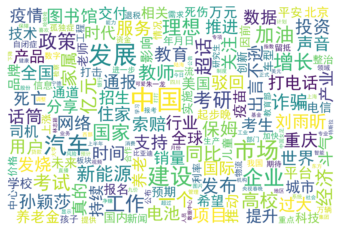

In [27]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=200,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq_tfidf)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()